## Asking the Right Question
Using the Machine Learning Workflow to process and transform Pima Indian Diabetes data (data source) to create a prediction model. This model must predict which people are likely to develop diabetes with 70% or greater accuracy (performance target). 

Covered Algorithms: Naive Bayes, Random Forest, Logistic Regression with Cross Validation

## Preparing Data

### Import Libraries

In [2]:
import pandas as pd # dataframe library
import matplotlib.pyplot as plt # plats data - visualization
import numpy as np # provides N-dimensional object support

# ploting inline instead of in a separate window
%matplotlib inline

### Load and review data

In [3]:
df = pd.read_csv("./data/pima-data.csv")  

In [4]:
df.shape #(row, column)

(768, 10)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| num_preg     | number of pregnancies         |
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
| insulin | 2-Hour serum insulin (mu U/ml) |
| bmi |  Body mass index (weight in kg/(height in m)^2) |
| diab_pred |  Diabetes pedigree function |
| Age (years) | Age (years)|
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) |  Why is our data boolean (True/False)? |

### Check for null values

In [7]:
df.isnull().values.any()

False

### Check for correlation features

In [8]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    
    Displays:
        matrix of correlation between columns.
        Blue-cyan-yellow-red-darkred => less to more correlated
        0 --------------------------> 1
        Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

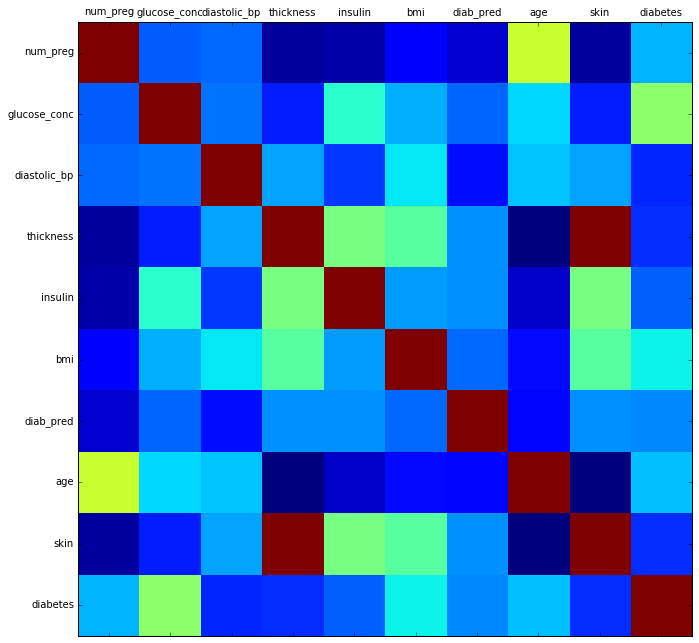

In [9]:
plot_corr(df)

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


Skin and thickness is correlated (1.0), both move together, having both columns doesn't add meaningful information, drop the skin column

In [12]:
del df['skin']

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


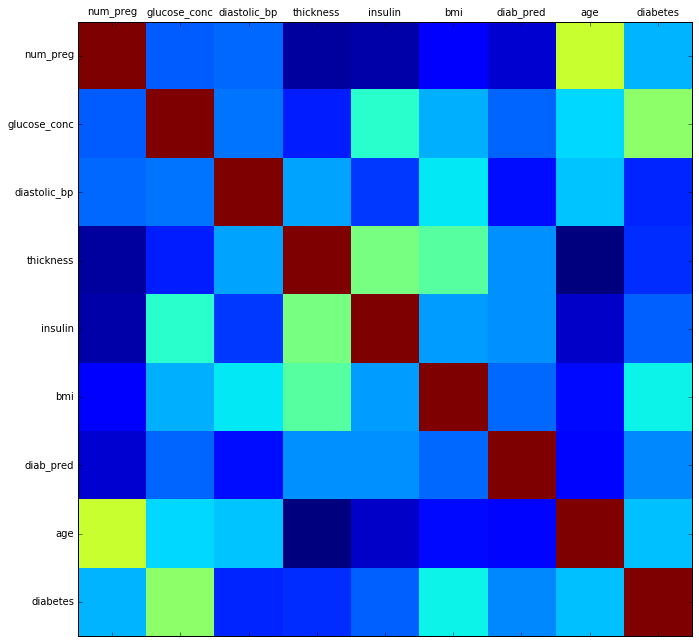

In [14]:
plot_corr(df)

### Check data types

In [15]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1, False to 0

In [19]:
diabetesMap = { True: 1, False: 0 }

In [20]:
df['diabetes'] = df['diabetes'].map(diabetesMap) 

In [21]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check true/false ratio

In [24]:
numOfTrue = len(df.loc[df['diabetes'] == True])
numOfFalse = len(df.loc[df['diabetes'] == False])
total = numOfTrue + numOfFalse

print("Number of True cases: {0} ({1:2.2f}%)".format(numOfTrue, numOfTrue/total * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(numOfFalse, numOfFalse/total * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


## Select the Algorithm

- Naive Bayes (Selected) - Simple, fast and stable to data changes
- Logistic Regression
- Decision Tree

Start from basic algorithm

## Training the Model

### Spliting the data

70% for training, 30% for testing

In [26]:
from sklearn.cross_validation import train_test_split

featureColumnNames = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predictedClassNames = ['diabetes']

x = df[featureColumnNames].values # predictor feature columns (8 x m)
y = df[predictedClassNames].values # predicted class (1=true, 0=false) column (1 x m)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.30, random_state=42)
# test_size = 0.3 is 30%, 42 is the answer to everything

C:\dev\lib\anaconda3\4.1.1\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
print("{0:0.2f}% in training set".format((len(xTrain)/len(df.index) * 100)))
print("{0:0.2f}% in testing set".format((len(xTest)/len(df.index) * 100)))

69.92% in training set
30.08% in testing set


#### Verifying predicted value was split correctly

In [39]:
print("Original True: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), len(df.loc[df['diabetes'] == 1])/len(df.index) * 100))
print("Original False: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), len(df.loc[df['diabetes'] == 0])/len(df.index) * 100))
print("")
print("Training True: {0} ({1:0.2f}%)".format(len(yTrain[yTrain[:] == 1]), len(yTrain[yTrain[:] == 1])/len(yTrain) * 100))
print("Training False: {0} ({1:0.2f}%)".format(len(yTrain[yTrain[:] == 0]), len(yTrain[yTrain[:] == 0])/len(yTrain) * 100))
print("")
print("Test True: {0} ({1:0.2f}%)".format(len(yTest[yTest[:] == 1]), len(yTest[yTest[:] == 1])/len(yTest) * 100))
print("Test False: {0} ({1:0.2f}%)".format(len(yTest[yTest[:] == 0]), len(yTest[yTest[:] == 0])/len(yTest) * 100))


Original True: 268 (34.90%)
Original False: 500 (65.10%)

Training True: 188 (35.01%)
Training False: 349 (64.99%)

Test True: 80 (34.63%)
Test False: 151 (65.37%)


### Post-split Data Preparation

#### Hidden Missing Values

In [40]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible such as in insulin and thickness column above?

How many rows have unexpected 0 values?

In [43]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing num_preg {0}".format(len(df.loc[df['num_preg'] == 0])))
print("# rows missing glucose_conc {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing num_preg 111
# rows missing glucose_conc 5
# rows missing diastolic_bp 35
# rows missing thickness 227
# rows missing insulin 374
# rows missing bmi 11
# rows missing diab_pred 0
# rows missing age 0


#### Impute with the mean

In [44]:
from sklearn.preprocessing import Imputer

#Impute with mean for all 0 values
fill_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

xTrain = fill_0.fit_transform(xTrain)
xTest = fill_0.fit_transform(xTest)

### Training Initial Algorithm - Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

#create Gaussian Naive Bayes model object and train it with the data
model = GaussianNB()
model.fit(xTrain, yTrain.ravel())

GaussianNB(priors=None)

## Testing the model (Evaluate Accuracy)

### Performance on Training Data

In [49]:
# predict values using the training data
predictTrain = model.predict(xTrain)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTrain, predictTrain)))
print()

Accuracy: 0.7542



In [50]:
# predict values using the testing data
predictTest = model.predict(xTest)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest, predictTest)))
print()

Accuracy: 0.7359



 #### Metrics

In [51]:
print("Confusion Matrix")

# Note the use of labels for the set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(yTest, predictTest, labels=[1, 0])))
print()

print("Classification Report")
print(metrics.classification_report(yTest, predictTest, labels=[1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



### Performance Improvement Options
- Adjust current algorithm
- Get more data or improve data
- Improve training using cross validation
- Switch algorithms

### Switch algorithm 1 - Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42) # Create random forest object
rf_model.fit(xTrain, yTrain.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

#### Predict Training Data

In [54]:
rf_predict_train = rf_model.predict(xTrain)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTrain, rf_predict_train)))

Accuracy: 0.9870


#### Predict Test Data

In [55]:
rf_predict_test = rf_model.predict(xTest)

# testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest, rf_predict_test)))

Accuracy: 0.7100


In [56]:
print("Confusion Matrix")

# Note the use of labels for the set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(yTest, rf_predict_test, labels=[1, 0])))
print()

print("Classification Report")
print(metrics.classification_report(yTest, rf_predict_test, labels=[1, 0]))

Confusion Matrix
[[ 43  37]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



### Switch algorithm 2 - Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = 0.7, random_state = 42)
lr_model.fit(xTrain, yTrain.ravel())
lr_predict_test = lr_model.predict(xTest)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest, lr_predict_test)))
print()
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(yTest, lr_predict_test, labels=[1, 0])))
print()
print("Classification Report")
print(metrics.classification_report(yTest, lr_predict_test, labels=[1, 0]))

Accuracy: 0.7446

Confusion Matrix
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



#### Setting regularization parameter

1st max value of 0.613 occured at C = 1.400


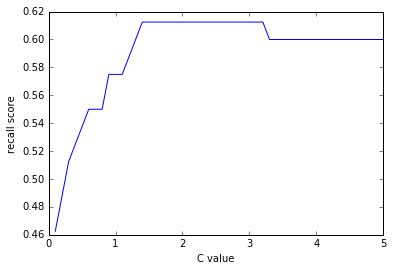

In [61]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, random_state = 42)
    lr_model_loop.fit(xTrain, yTrain.ravel())
    lr_predict_test_loop = lr_model_loop.predict(xTest)
    recall_score = metrics.recall_score(yTest, lr_predict_test_loop)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_test_loop
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print ("1st max value of {0:.3f} occured at C = {1:.3f}".format(best_recall_score, best_score_C_val))

#matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")
        

#### Fixing unbalanced classes with class_weight='balanced'

1st max value of 0.738 occured at C = 0.300


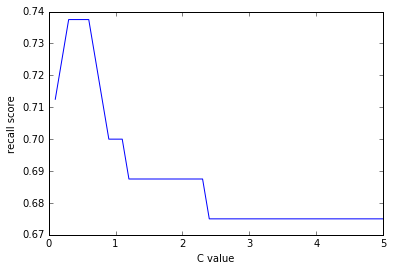

In [62]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight="balanced", random_state = 42)
    lr_model_loop.fit(xTrain, yTrain.ravel())
    lr_predict_test_loop = lr_model_loop.predict(xTest)
    recall_score = metrics.recall_score(yTest, lr_predict_test_loop)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_test_loop
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print ("1st max value of {0:.3f} occured at C = {1:.3f}".format(best_recall_score, best_score_C_val))

#matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")
        

In [63]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = best_score_C_val, class_weight="balanced", random_state = 42)
lr_model.fit(xTrain, yTrain.ravel())
lr_predict_test = lr_model.predict(xTest)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest, lr_predict_test)))
print()
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(yTest, lr_predict_test, labels=[1, 0])))
print()
print("Classification Report")
print(metrics.classification_report(yTest, lr_predict_test, labels=[1, 0]))

Accuracy: 0.7143

Confusion Matrix
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231



### Cross Validation in Logistic Regression

#### LogisticRegressionCV

In [71]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced")
lr_cv_model.fit(xTrain, yTrain.ravel())
lr_cv_predict_test = lr_cv_model.predict(xTest)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest, lr_cv_predict_test)))
print()
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(yTest, lr_cv_predict_test, labels=[1, 0])))
print()
print("Classification Report")
print(metrics.classification_report(yTest, lr_cv_predict_test, labels=[1, 0]))

Accuracy: 0.7056

Confusion Matrix
[[ 54  26]
 [ 42 109]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.68      0.61        80
          0       0.81      0.72      0.76       151

avg / total       0.72      0.71      0.71       231

